In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv", lineterminator='\n')

# Remove duplicates
df = df.drop_duplicates()

# Drop unwanted columns
df.drop(['country', 'director', 'show_id'], axis=1, inplace=True)

# Count frequency of each rating
rating_counts = df['rating'].value_counts()

# Define thresholds
high = rating_counts.quantile(0.75)
low = rating_counts.quantile(0.25)

# Categorize ratings
def categorize_rating(r):
    if pd.isna(r):
        return "Not Rated"
    count = rating_counts.get(r, 0)
    if count >= high:
        return "Popular"
    elif count <= low:
        return "Below Average"
    else:
        return "Average"

df['rating'] = df['rating'].apply(categorize_rating)

# Drop rows where rating could not be assigned
df = df[df['rating'].notna()]


print("Dataset cleaned successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n Rating categories distribution:")
print(df['rating'].value_counts())

# Show first 5 cleaned rows
df.head()

Dataset cleaned successfully!
Rows: 8807, Columns: 9

 Rating categories distribution:
rating
Popular          7519
Average          1275
Below Average       9
Not Rated           4
Name: count, dtype: int64


,type,title,cast,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,"September 25, 2021",2020,Popular,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,Popular,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,Popular,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,Popular,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,Popular,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#data visualization
sns.set_style("whitegrid")

In [3]:
df['listed_in'].describe()

count                             8807
unique                             514
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object

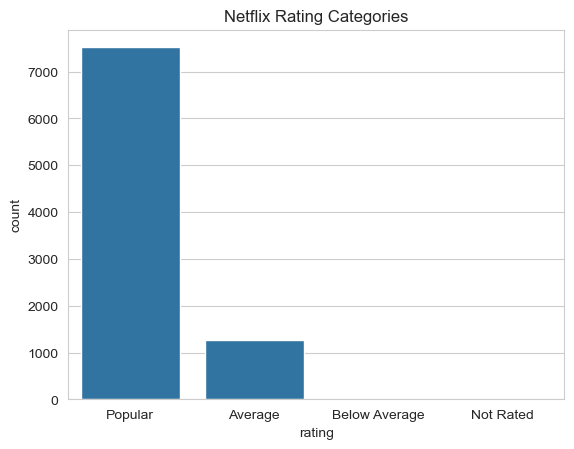

In [4]:
sns.countplot(x='rating', data=df, order=["Popular", "Average", "Below Average", "Not Rated"])
plt.title("Netflix Rating Categories")
plt.show()


In [13]:

df[df['rating'] == df['rating'].min()]

,type,title,cast,date_added,release_year,rating,duration,listed_in,description
6,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...","September 24, 2021",2021,Average,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
23,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...","September 21, 2021",2021,Average,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
34,TV Show,Tayo and Little Wizards,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...","September 17, 2021",2020,Average,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...
37,TV Show,Angry Birds,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...","September 16, 2021",2018,Average,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h..."
39,TV Show,Chhota Bheem,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...","September 16, 2021",2021,Average,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
...,...,...,...,...,...,...,...,...,...
8793,Movie,"Yours, Mine and Ours","Dennis Quaid, Rene Russo, Sean Faris, Katija P...","November 20, 2019",2005,Average,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8795,TV Show,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","May 1, 2018",2015,Average,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8797,TV Show,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...","September 13, 2018",2016,Average,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8803,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,Average,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


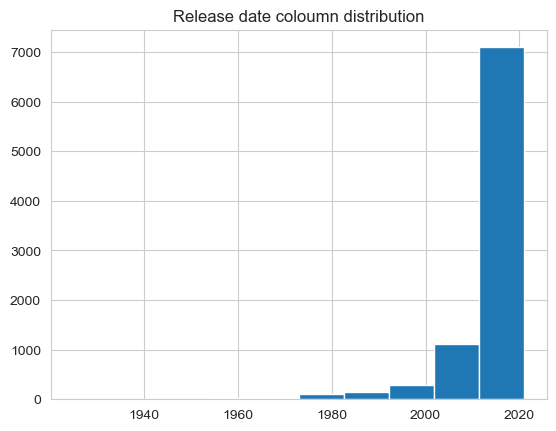

In [14]:
df['release_year'].hist()
plt.title('Release date coloumn distribution')
plt.show()

Movies vs TV Shows Count


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11368\3527465533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="pastel")


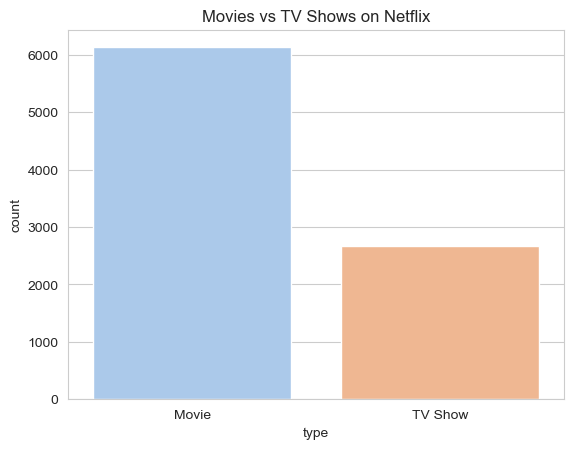

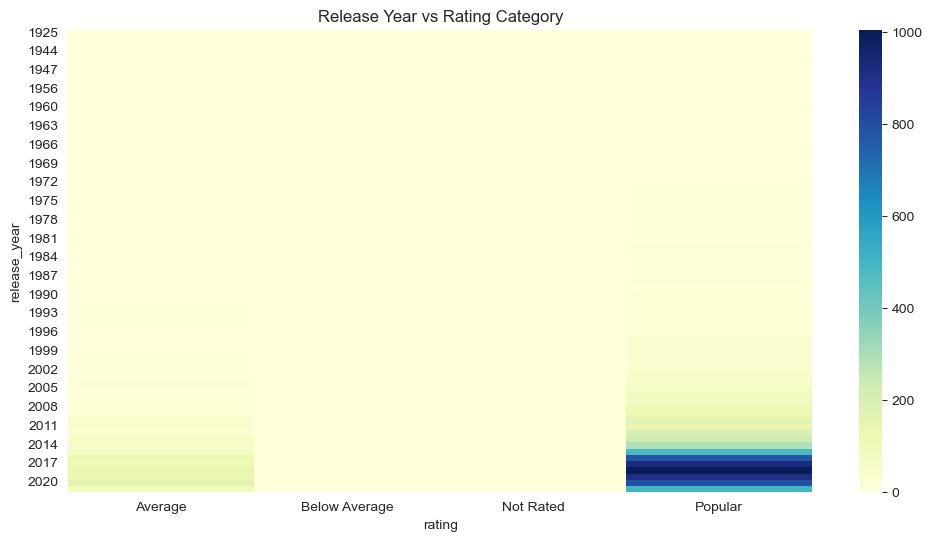

In [16]:
# --- Movies vs TV Shows ---
sns.countplot(x='type', data=df, palette="pastel")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

# --- Heatmap of Release Year vs Rating ---
pivot_table = pd.crosstab(df['release_year'], df['rating'])
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar=True)
plt.title("Release Year vs Rating Category")
plt.show()